<a href="https://colab.research.google.com/github/adityachoudharyclg/internshipProjectClg/blob/master/Community_detection_using_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Adding relevant datasets and files from github
!wget https://github.com/adityachoudharyclg/internshipProjectClg/archive/master.zip

--2020-07-13 13:38:38--  https://github.com/adityachoudharyclg/internshipProjectClg/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/adityachoudharyclg/internshipProjectClg/zip/master [following]
--2020-07-13 13:38:39--  https://codeload.github.com/adityachoudharyclg/internshipProjectClg/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [  <=>               ]   4.29M  8.01MB/s    in 0.5s    

2020-07-13 13:38:39 (8.01 MB/s) - ‘master.zip’ saved [4503461]



In [2]:
!unzip master.zip

Archive:  master.zip
8f74506e8000d9319c8012beee65dc5121120e3b
   creating: internshipProjectClg-master/
   creating: internshipProjectClg-master/Datasets/
   creating: internshipProjectClg-master/Datasets/__pycache__/
  inflating: internshipProjectClg-master/Datasets/__pycache__/lfrData.cpython-37.pyc  
  inflating: internshipProjectClg-master/Datasets/adjnoun.gml  
  inflating: internshipProjectClg-master/Datasets/dolphins.gml  
  inflating: internshipProjectClg-master/Datasets/email-Eu-core-department-labels.txt  
  inflating: internshipProjectClg-master/Datasets/email-Eu-core.txt  
  inflating: internshipProjectClg-master/Datasets/football.gml  
  inflating: internshipProjectClg-master/Datasets/karate.gml  
  inflating: internshipProjectClg-master/Datasets/lfrData.py  
  inflating: internshipProjectClg-master/Datasets/polbooks.gml  
  inflating: internshipProjectClg-master/autoencoderProject.py  
  inflating: internshipProjectClg-master/project.ipynb  


In [8]:
import os
if(os.getcwd()!='/content/internshipProjectClg-master'):
    %cd internshipProjectClg-master

In [9]:
import autoencoderProject

# Calculating NMI on Football dataset

Enter your choice (0-7):1


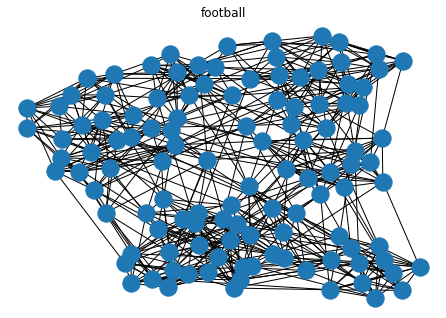

In [10]:
# Loading required datasets
datasets={
    '0':'karate',
    '1':'football',
    '2':'polbooks',
    '3':'dolphin',
    '4':'lfr 0.1',
    '5':'lfr 0.3',
    '6':'lfr 0.5',
    '7':'email'
}
choice = input("Enter your choice (0-7):")
G_data,B_data=autoencoderProject.load_dataset(datasets[choice])
autoencoderProject.drawDataset(G_data,datasets[choice])

In [11]:
hidden_layers={
    '0':[32,16],
    '1':[64,32],
    '2':[64,32],
    '3':[32,16],
    '4':[64,32,16],
    '5':[64,32,16],
    '6':[64,32],
    '7':[512,256,128]
}

epoch_per_layer={
    '0':[200,200],
    '1':[200,200,200],
    '2':[50,50],
    '3':[200,200],
    '4':[200,100,100],
    '5':[100,300,200],
    '6':[100,300],
    '7':[100,100,100]
}



epoch : 1/200, recon loss = 0.09078710
epoch : 2/200, recon loss = 0.08891045
epoch : 3/200, recon loss = 0.08722888
epoch : 4/200, recon loss = 0.08570631
epoch : 5/200, recon loss = 0.08431018
epoch : 6/200, recon loss = 0.08301144
epoch : 7/200, recon loss = 0.08178471
epoch : 8/200, recon loss = 0.08060823
epoch : 9/200, recon loss = 0.07946362
epoch : 10/200, recon loss = 0.07833554
epoch : 11/200, recon loss = 0.07721134
epoch : 12/200, recon loss = 0.07608065
epoch : 13/200, recon loss = 0.07493536
epoch : 14/200, recon loss = 0.07376958
epoch : 15/200, recon loss = 0.07257979
epoch : 16/200, recon loss = 0.07136495
epoch : 17/200, recon loss = 0.07012660
epoch : 18/200, recon loss = 0.06886891
epoch : 19/200, recon loss = 0.06759843
epoch : 20/200, recon loss = 0.06632367
epoch : 21/200, recon loss = 0.06505427
epoch : 22/200, recon loss = 0.06379996
epoch : 23/200, recon loss = 0.06256924
epoch : 24/200, recon loss = 0.06136826
epoch : 25/200, recon loss = 0.06020003
epoch : 2

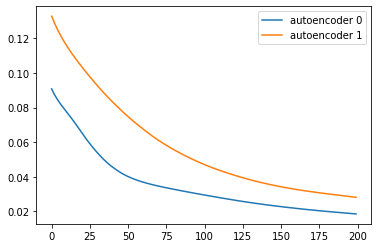

Index:0	Max NMI till now:0.9325053086238333
Index:98	Max NMI till now:0.9415660031165817
Index:98	Max NMI till now:0.9415660031165817
Index:98	Max NMI till now:0.9415660031165817
Index:98	Max NMI till now:0.9415660031165817
Index:98	Max NMI till now:0.9415660031165817
Index:98	Max NMI till now:0.9415660031165817
Index:98	Max NMI till now:0.9415660031165817
Index:98	Max NMI till now:0.9415660031165817
Index:98	Max NMI till now:0.9415660031165817
Index:98	Max NMI till now:0.9415660031165817
98


In [12]:
encoder=autoencoderProject.fit_dataset(B_data,hidden_layers=hidden_layers[choice],epoch_per_layer=epoch_per_layer[choice])
r_state=autoencoderProject.calcMaxState(G_data, B_data, datasets[choice], encoder)
print(r_state)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
original_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,only_kmeans=True)
optimized_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,r_state=r_state)

NMI when applying only kmeans:0.8924
NMI on applying autoencoder:0.9416
Improvement upon kmeans:4.9%


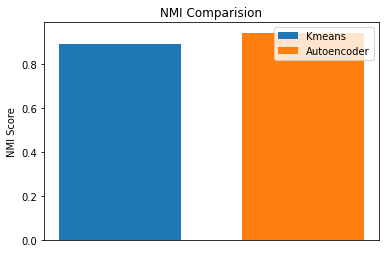

In [15]:
if((optimized_nmi-original_nmi)>0):
    print("NMI when applying only kmeans:{:.4f}".format(original_nmi))
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))
    print("Improvement upon kmeans:{:.1f}%".format((optimized_nmi-original_nmi)*100))
    fig, ax = plt.subplots()
    labels=['Kmeans','Autoencoder']
    x = np.arange(1)
    width=0.25
    rects1 = ax.bar(x + 0.0, original_nmi, width, label=labels[0])
    rects2 = ax.bar(x + 0.375, optimized_nmi, width, label=labels[1])
    ax.set_ylabel('NMI Score')
    ax.set_title('NMI Comparision')
    plt.xticks([])
    ax.legend()
    plt.show()
else:
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))

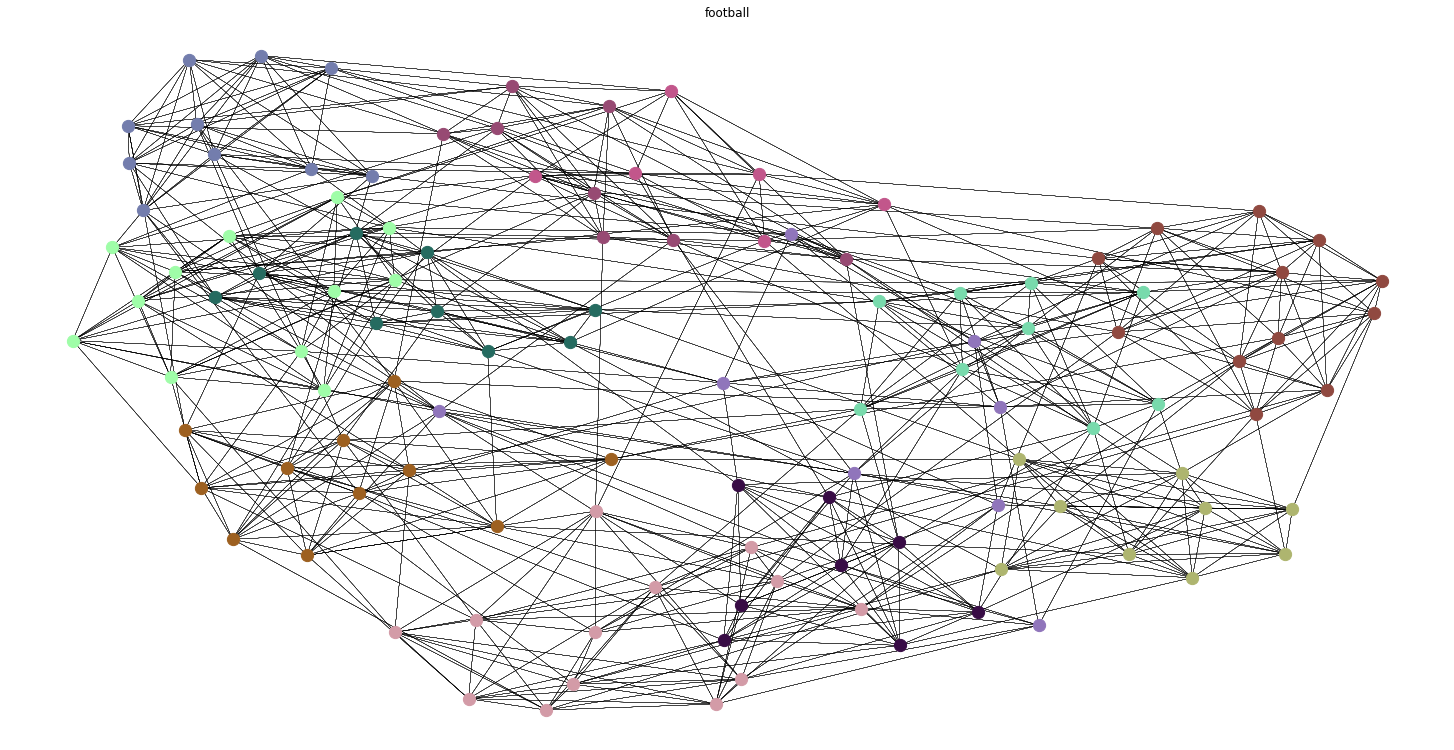

In [16]:
autoencoderProject.show_clustering(G_data,B_data,datasets[choice],encoder,r_state)

# Calculating NMI on Karate Dataset

Enter your choice (0-7):0


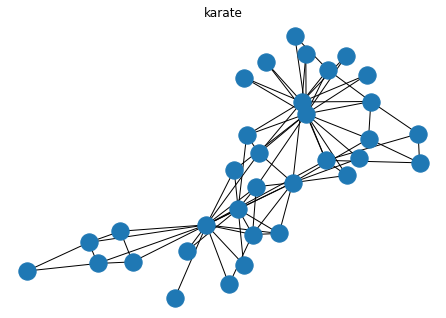

In [18]:
# Choosing and drawing dataset
choice = input("Enter your choice (0-7):")
G_data,B_data=autoencoderProject.load_dataset(datasets[choice])
autoencoderProject.drawDataset(G_data,datasets[choice])




epoch : 1/200, recon loss = 0.12469247
epoch : 2/200, recon loss = 0.12229306
epoch : 3/200, recon loss = 0.12000100
epoch : 4/200, recon loss = 0.11780984
epoch : 5/200, recon loss = 0.11571193
epoch : 6/200, recon loss = 0.11369883
epoch : 7/200, recon loss = 0.11176192
epoch : 8/200, recon loss = 0.10989276
epoch : 9/200, recon loss = 0.10808323
epoch : 10/200, recon loss = 0.10632572
epoch : 11/200, recon loss = 0.10461319
epoch : 12/200, recon loss = 0.10293929
epoch : 13/200, recon loss = 0.10129841
epoch : 14/200, recon loss = 0.09968577
epoch : 15/200, recon loss = 0.09809747
epoch : 16/200, recon loss = 0.09653046
epoch : 17/200, recon loss = 0.09498254
epoch : 18/200, recon loss = 0.09345228
epoch : 19/200, recon loss = 0.09193896
epoch : 20/200, recon loss = 0.09044245
epoch : 21/200, recon loss = 0.08896312
epoch : 22/200, recon loss = 0.08750167
epoch : 23/200, recon loss = 0.08605904
epoch : 24/200, recon loss = 0.08463624
epoch : 25/200, recon loss = 0.08323428
epoch : 2

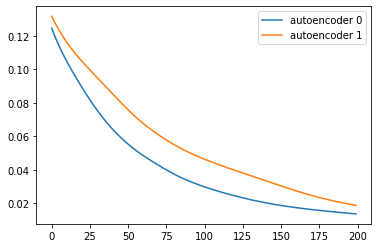

Index:0	Max NMI till now:0.8371694628777809
Index:2	Max NMI till now:1.0
Index:2	Max NMI till now:1.0
Index:2	Max NMI till now:1.0
Index:2	Max NMI till now:1.0
Index:2	Max NMI till now:1.0
Index:2	Max NMI till now:1.0
Index:2	Max NMI till now:1.0
Index:2	Max NMI till now:1.0
Index:2	Max NMI till now:1.0
Index:2	Max NMI till now:1.0
2


In [19]:
# Applying autoencoder and computing nmi score
encoder=autoencoderProject.fit_dataset(B_data,hidden_layers=hidden_layers[choice],epoch_per_layer=epoch_per_layer[choice])
r_state=autoencoderProject.calcMaxState(G_data, B_data, datasets[choice], encoder)
print(r_state)

NMI when applying only kmeans:0.0004
NMI on applying autoencoder:1.0000
Improvement upon kmeans:100.0%


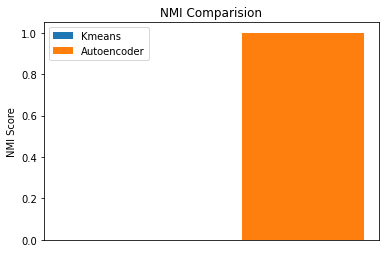

In [20]:
# Displaying results
original_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,only_kmeans=True)
optimized_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,r_state=r_state)

if((optimized_nmi-original_nmi)>0):
    print("NMI when applying only kmeans:{:.4f}".format(original_nmi))
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))
    print("Improvement upon kmeans:{:.1f}%".format((optimized_nmi-original_nmi)*100))
    fig, ax = plt.subplots()
    labels=['Kmeans','Autoencoder']
    x = np.arange(1)
    width=0.25
    rects1 = ax.bar(x + 0.0, original_nmi, width, label=labels[0])
    rects2 = ax.bar(x + 0.375, optimized_nmi, width, label=labels[1])
    ax.set_ylabel('NMI Score')
    ax.set_title('NMI Comparision')
    plt.xticks([])
    ax.legend()
    plt.show()
else:
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))


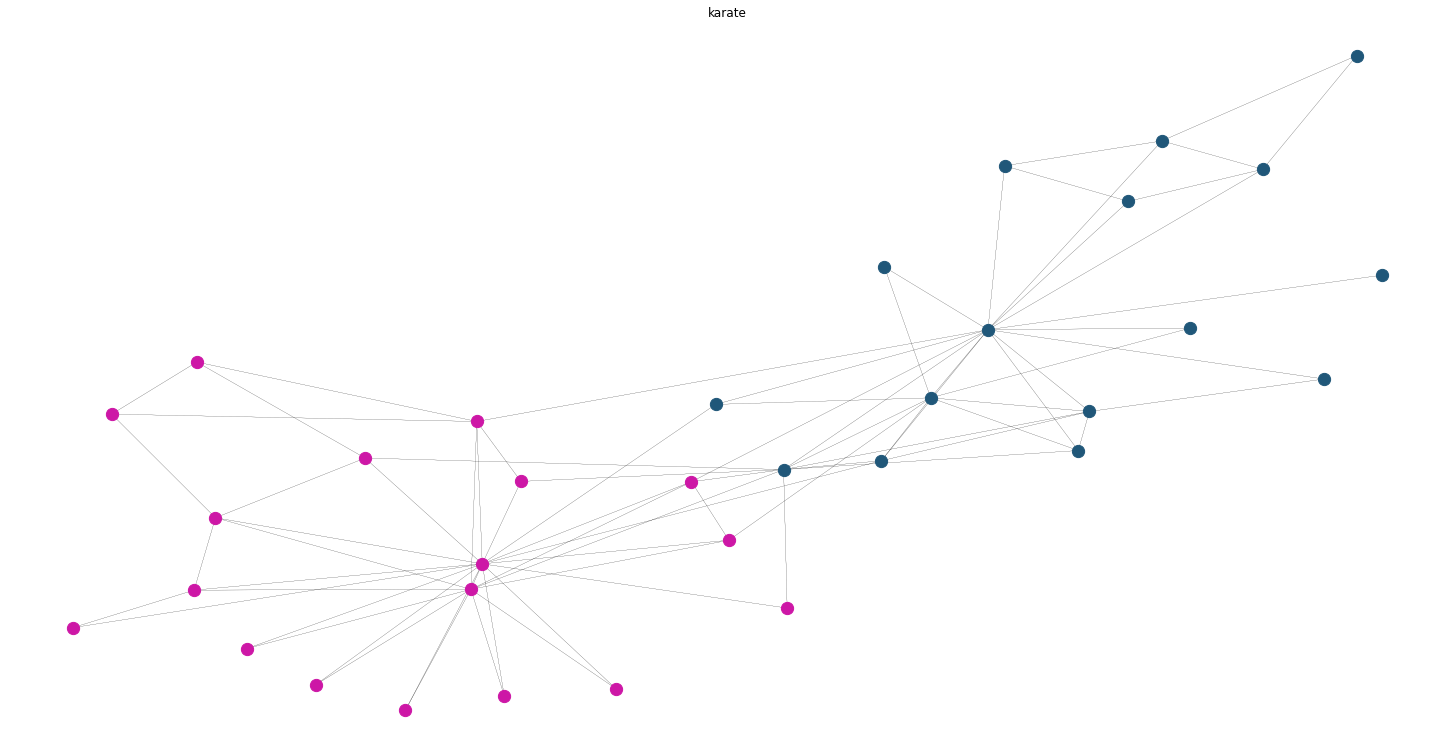

In [22]:
autoencoderProject.show_clustering(G_data,B_data,datasets[choice],encoder,r_state)

# Calculating NMI on Dolphin dataset

Enter your choice (0-7):3


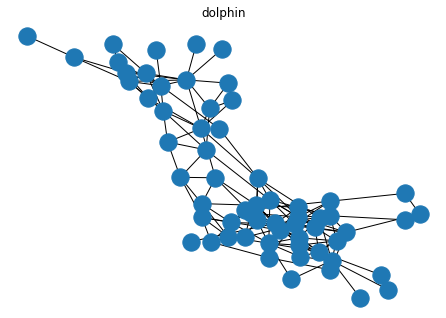

In [23]:
# Choosing and drawing dataset
choice = input("Enter your choice (0-7):")
G_data,B_data=autoencoderProject.load_dataset(datasets[choice])
autoencoderProject.drawDataset(G_data,datasets[choice])



epoch : 1/200, recon loss = 0.08915699
epoch : 2/200, recon loss = 0.08714524
epoch : 3/200, recon loss = 0.08526862
epoch : 4/200, recon loss = 0.08351965
epoch : 5/200, recon loss = 0.08188987
epoch : 6/200, recon loss = 0.08037011
epoch : 7/200, recon loss = 0.07895117
epoch : 8/200, recon loss = 0.07762394
epoch : 9/200, recon loss = 0.07637948
epoch : 10/200, recon loss = 0.07520917
epoch : 11/200, recon loss = 0.07410486
epoch : 12/200, recon loss = 0.07305894
epoch : 13/200, recon loss = 0.07206438
epoch : 14/200, recon loss = 0.07111473
epoch : 15/200, recon loss = 0.07020419
epoch : 16/200, recon loss = 0.06932754
epoch : 17/200, recon loss = 0.06848023
epoch : 18/200, recon loss = 0.06765825
epoch : 19/200, recon loss = 0.06685824
epoch : 20/200, recon loss = 0.06607740
epoch : 21/200, recon loss = 0.06531353
epoch : 22/200, recon loss = 0.06456497
epoch : 23/200, recon loss = 0.06383062
epoch : 24/200, recon loss = 0.06310986
epoch : 25/200, recon loss = 0.06240255
epoch : 2

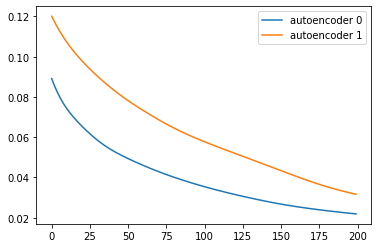

Index:0	Max NMI till now:0.35245806491225207
Index:45	Max NMI till now:0.7115142769323431
Index:133	Max NMI till now:0.7511052261550328
Index:133	Max NMI till now:0.7511052261550328
Index:133	Max NMI till now:0.7511052261550328
Index:484	Max NMI till now:0.8656560116315077
Index:484	Max NMI till now:0.8656560116315077
Index:484	Max NMI till now:0.8656560116315077
Index:484	Max NMI till now:0.8656560116315077
Index:484	Max NMI till now:0.8656560116315077
Index:484	Max NMI till now:0.8656560116315077
484


In [24]:
# Applying autoencoder and computing nmi score
encoder=autoencoderProject.fit_dataset(B_data,hidden_layers=hidden_layers[choice],epoch_per_layer=epoch_per_layer[choice])
r_state=autoencoderProject.calcMaxState(G_data, B_data, datasets[choice], encoder)
print(r_state)

NMI when applying only kmeans:0.7471
NMI on applying autoencoder:0.8657
Improvement upon kmeans:11.9%


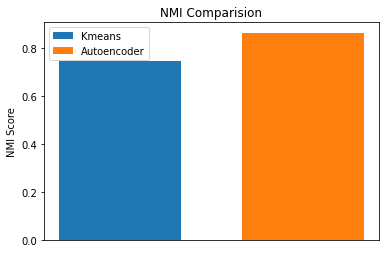

In [25]:
# Displaying results
original_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,only_kmeans=True)
optimized_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,r_state=r_state)

if((optimized_nmi-original_nmi)>0):
    print("NMI when applying only kmeans:{:.4f}".format(original_nmi))
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))
    print("Improvement upon kmeans:{:.1f}%".format((optimized_nmi-original_nmi)*100))
    fig, ax = plt.subplots()
    labels=['Kmeans','Autoencoder']
    x = np.arange(1)
    width=0.25
    rects1 = ax.bar(x + 0.0, original_nmi, width, label=labels[0])
    rects2 = ax.bar(x + 0.375, optimized_nmi, width, label=labels[1])
    ax.set_ylabel('NMI Score')
    ax.set_title('NMI Comparision')
    plt.xticks([])
    ax.legend()
    plt.show()
else:
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))


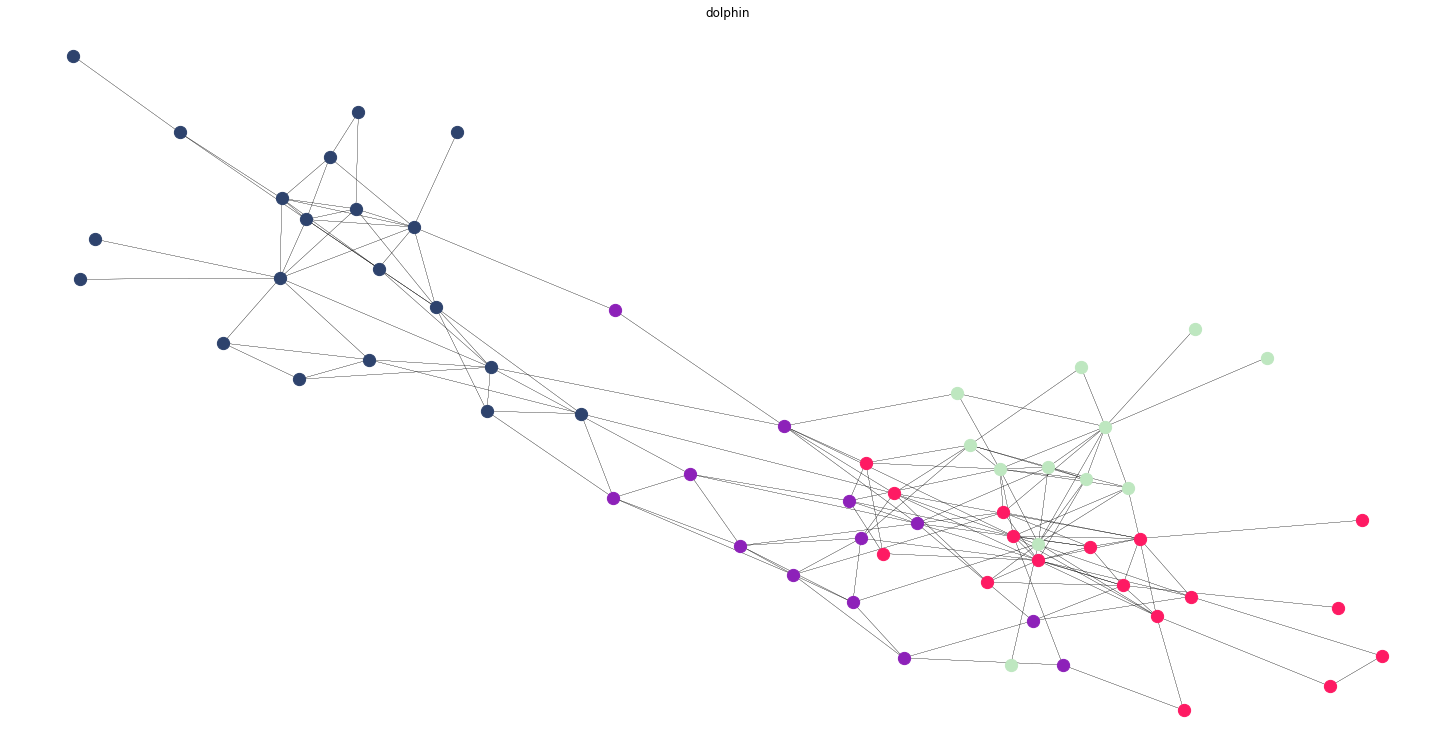

In [28]:
autoencoderProject.show_clustering(G_data,B_data,datasets[choice],encoder,r_state)

# Calculating NMI on Polbooks dataset

Enter your choice (0-7):2


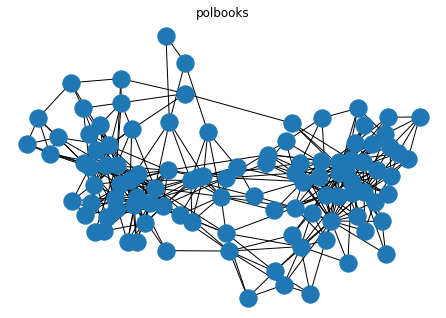

In [31]:
# Choosing and drawing dataset
choice = input("Enter your choice (0-7):")
G_data,B_data=autoencoderProject.load_dataset(datasets[choice])
autoencoderProject.drawDataset(G_data,datasets[choice])


epoch : 1/50, recon loss = 0.07652792
epoch : 2/50, recon loss = 0.07473181
epoch : 3/50, recon loss = 0.07309213
epoch : 4/50, recon loss = 0.07157010
epoch : 5/50, recon loss = 0.07013211
epoch : 6/50, recon loss = 0.06874900
epoch : 7/50, recon loss = 0.06739721
epoch : 8/50, recon loss = 0.06605928
epoch : 9/50, recon loss = 0.06472411
epoch : 10/50, recon loss = 0.06338726
epoch : 11/50, recon loss = 0.06205148
epoch : 12/50, recon loss = 0.06072686
epoch : 13/50, recon loss = 0.05943034
epoch : 14/50, recon loss = 0.05818408
epoch : 15/50, recon loss = 0.05701222
epoch : 16/50, recon loss = 0.05593589
epoch : 17/50, recon loss = 0.05496736
epoch : 18/50, recon loss = 0.05410563
epoch : 19/50, recon loss = 0.05333600
epoch : 20/50, recon loss = 0.05263487
epoch : 21/50, recon loss = 0.05197780
epoch : 22/50, recon loss = 0.05134651
epoch : 23/50, recon loss = 0.05073238
epoch : 24/50, recon loss = 0.05013547
epoch : 25/50, recon loss = 0.04956052
epoch : 26/50, recon loss = 0.0490

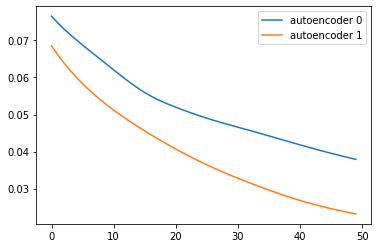

Index:0	Max NMI till now:0.5560943570906617
Index:0	Max NMI till now:0.5560943570906617
Index:0	Max NMI till now:0.5560943570906617
Index:0	Max NMI till now:0.5560943570906617
Index:0	Max NMI till now:0.5560943570906617
Index:0	Max NMI till now:0.5560943570906617
Index:0	Max NMI till now:0.5560943570906617
Index:0	Max NMI till now:0.5560943570906617
Index:0	Max NMI till now:0.5560943570906617
Index:0	Max NMI till now:0.5560943570906617
Index:0	Max NMI till now:0.5560943570906617
0


In [32]:
# Applying autoencoder and computing nmi score
encoder=autoencoderProject.fit_dataset(B_data,hidden_layers=hidden_layers[choice],epoch_per_layer=epoch_per_layer[choice])
r_state=autoencoderProject.calcMaxState(G_data, B_data, datasets[choice], encoder)
print(r_state)

NMI when applying only kmeans:0.4544
NMI on applying autoencoder:0.5561
Improvement upon kmeans:10.2%


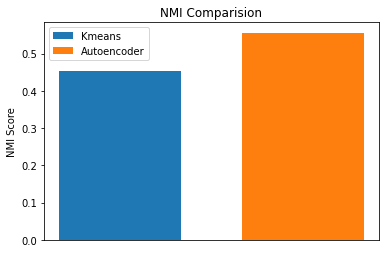

In [33]:
# Displaying results
original_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,only_kmeans=True)
optimized_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,r_state=r_state)

if((optimized_nmi-original_nmi)>0):
    print("NMI when applying only kmeans:{:.4f}".format(original_nmi))
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))
    print("Improvement upon kmeans:{:.1f}%".format((optimized_nmi-original_nmi)*100))
    fig, ax = plt.subplots()
    labels=['Kmeans','Autoencoder']
    x = np.arange(1)
    width=0.25
    rects1 = ax.bar(x + 0.0, original_nmi, width, label=labels[0])
    rects2 = ax.bar(x + 0.375, optimized_nmi, width, label=labels[1])
    ax.set_ylabel('NMI Score')
    ax.set_title('NMI Comparision')
    plt.xticks([])
    ax.legend()
    plt.show()
else:
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))



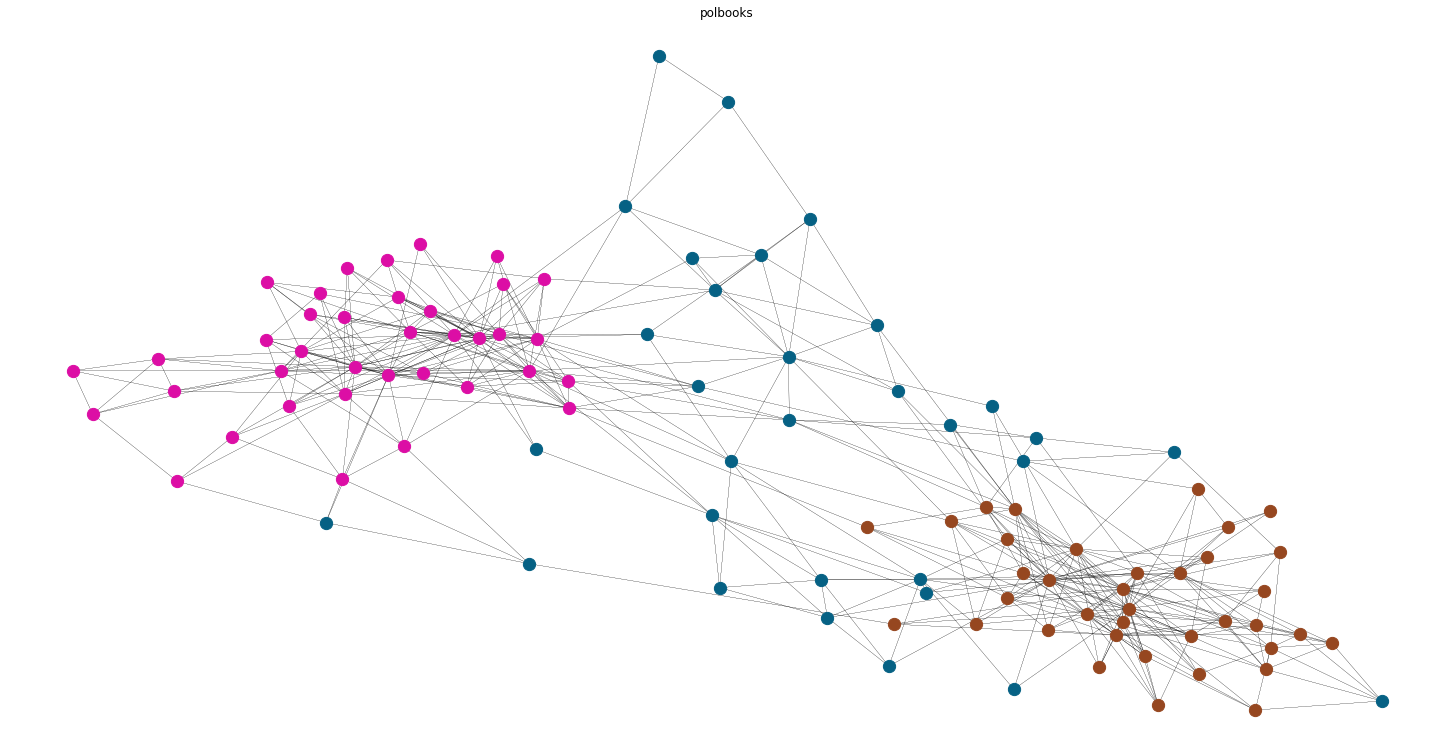

In [35]:
autoencoderProject.show_clustering(G_data,B_data,datasets[choice],encoder,r_state)

# Calculating NMI on lfr 0.1 dataset

Enter your choice (0-7):4


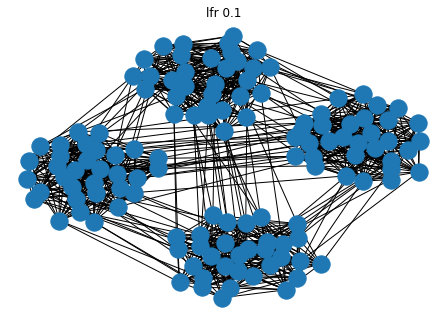

In [36]:
# Choosing and drawing dataset
choice = input("Enter your choice (0-7):")
G_data,B_data=autoencoderProject.load_dataset(datasets[choice])
autoencoderProject.drawDataset(G_data,datasets[choice])

epoch : 1/200, recon loss = 0.11731058
epoch : 2/200, recon loss = 0.11501620
epoch : 3/200, recon loss = 0.11290874
epoch : 4/200, recon loss = 0.11093130
epoch : 5/200, recon loss = 0.10903065
epoch : 6/200, recon loss = 0.10716035
epoch : 7/200, recon loss = 0.10528249
epoch : 8/200, recon loss = 0.10336800
epoch : 9/200, recon loss = 0.10139721
epoch : 10/200, recon loss = 0.09936040
epoch : 11/200, recon loss = 0.09725838
epoch : 12/200, recon loss = 0.09510274
epoch : 13/200, recon loss = 0.09291571
epoch : 14/200, recon loss = 0.09072928
epoch : 15/200, recon loss = 0.08858303
epoch : 16/200, recon loss = 0.08652021
epoch : 17/200, recon loss = 0.08458236
epoch : 18/200, recon loss = 0.08280304
epoch : 19/200, recon loss = 0.08120245
epoch : 20/200, recon loss = 0.07978426
epoch : 21/200, recon loss = 0.07853552
epoch : 22/200, recon loss = 0.07742933
epoch : 23/200, recon loss = 0.07643040
epoch : 24/200, recon loss = 0.07550380
epoch : 25/200, recon loss = 0.07462426
epoch : 2

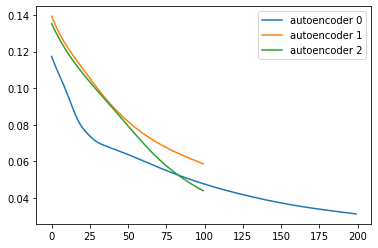

Index:0	Max NMI till now:1.0
Index:0	Max NMI till now:1.0
Index:0	Max NMI till now:1.0
Index:0	Max NMI till now:1.0
Index:0	Max NMI till now:1.0
Index:0	Max NMI till now:1.0
Index:0	Max NMI till now:1.0
Index:0	Max NMI till now:1.0
Index:0	Max NMI till now:1.0
Index:0	Max NMI till now:1.0
Index:0	Max NMI till now:1.0
0


In [37]:
# Applying autoencoder and computing nmi score
encoder=autoencoderProject.fit_dataset(B_data,hidden_layers=hidden_layers[choice],epoch_per_layer=epoch_per_layer[choice])
r_state=autoencoderProject.calcMaxState(G_data, B_data, datasets[choice], encoder)
print(r_state)

In [38]:
# Displaying results
original_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,only_kmeans=True)
optimized_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,r_state=r_state)

if((optimized_nmi-original_nmi)>0):
    print("NMI when applying only kmeans:{:.4f}".format(original_nmi))
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))
    print("Improvement upon kmeans:{:.1f}%".format((optimized_nmi-original_nmi)*100))
    fig, ax = plt.subplots()
    labels=['Kmeans','Autoencoder']
    x = np.arange(1)
    width=0.25
    rects1 = ax.bar(x + 0.0, original_nmi, width, label=labels[0])
    rects2 = ax.bar(x + 0.375, optimized_nmi, width, label=labels[1])
    ax.set_ylabel('NMI Score')
    ax.set_title('NMI Comparision')
    plt.xticks([])
    ax.legend()
    plt.show()
else:
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))



NMI on applying autoencoder:1.0000


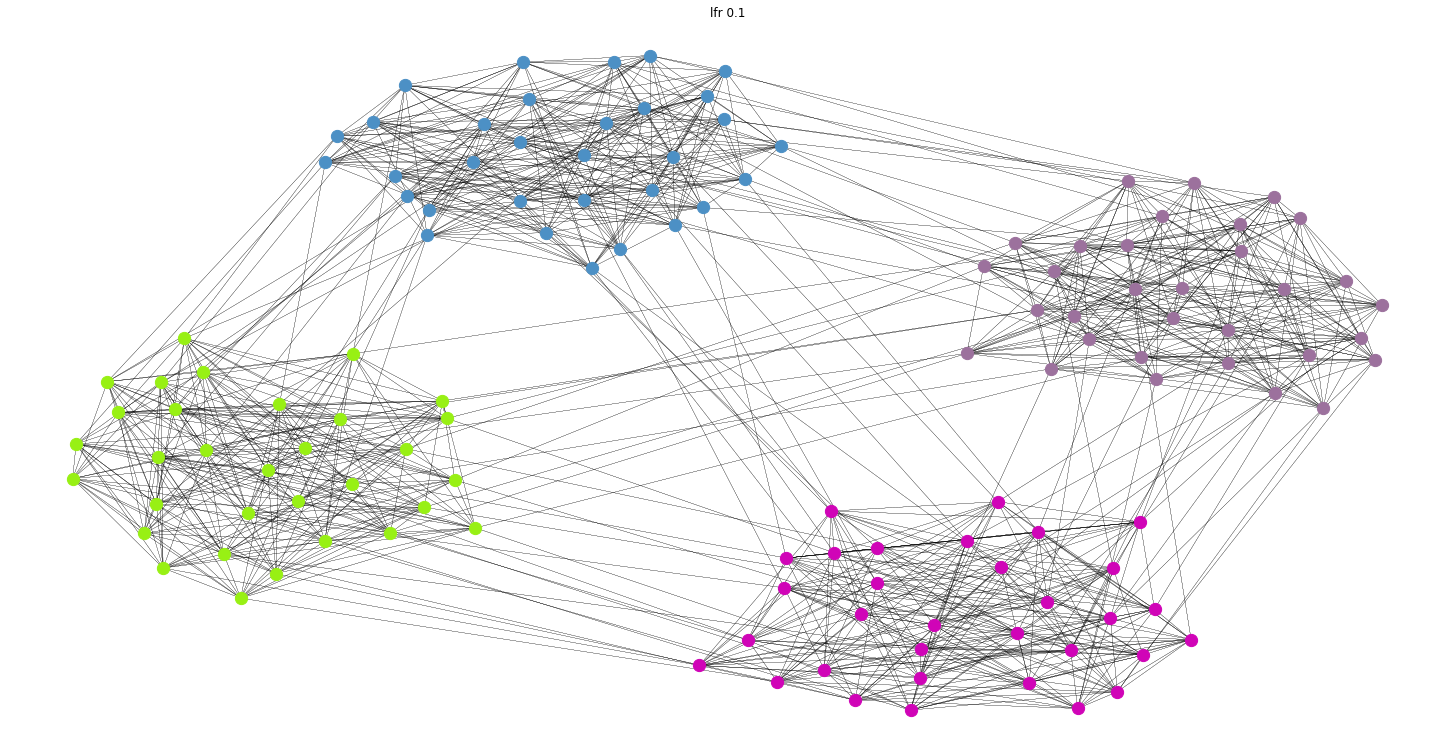

In [44]:
autoencoderProject.show_clustering(G_data,B_data,datasets[choice],encoder,r_state)

# Calculating NMI on lfr 0.3 dataset

Enter your choice (0-7):5


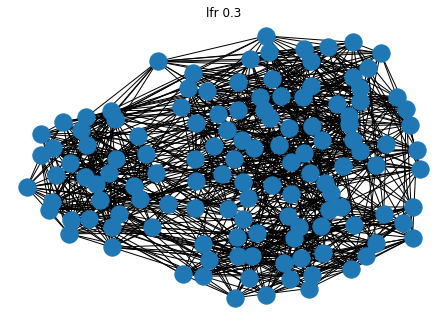

In [45]:
# Choosing and drawing dataset
choice = input("Enter your choice (0-7):")
G_data,B_data=autoencoderProject.load_dataset(datasets[choice])
autoencoderProject.drawDataset(G_data,datasets[choice])

epoch : 1/100, recon loss = 0.11796445
epoch : 2/100, recon loss = 0.11609541
epoch : 3/100, recon loss = 0.11439214
epoch : 4/100, recon loss = 0.11282527
epoch : 5/100, recon loss = 0.11136748
epoch : 6/100, recon loss = 0.10999393
epoch : 7/100, recon loss = 0.10868267
epoch : 8/100, recon loss = 0.10741477
epoch : 9/100, recon loss = 0.10617421
epoch : 10/100, recon loss = 0.10494773
epoch : 11/100, recon loss = 0.10372471
epoch : 12/100, recon loss = 0.10249715
epoch : 13/100, recon loss = 0.10125975
epoch : 14/100, recon loss = 0.10001003
epoch : 15/100, recon loss = 0.09874841
epoch : 16/100, recon loss = 0.09747826
epoch : 17/100, recon loss = 0.09620583
epoch : 18/100, recon loss = 0.09493977
epoch : 19/100, recon loss = 0.09369022
epoch : 20/100, recon loss = 0.09246746
epoch : 21/100, recon loss = 0.09128037
epoch : 22/100, recon loss = 0.09013506
epoch : 23/100, recon loss = 0.08903410
epoch : 24/100, recon loss = 0.08797667
epoch : 25/100, recon loss = 0.08695943
epoch : 2

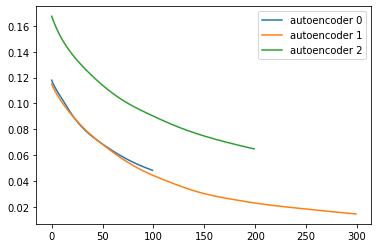

Index:0	Max NMI till now:0.7964814643094397
Index:38	Max NMI till now:0.8813624157889015
Index:38	Max NMI till now:0.8813624157889015
Index:38	Max NMI till now:0.8813624157889015
Index:38	Max NMI till now:0.8813624157889015
Index:38	Max NMI till now:0.8813624157889015
Index:38	Max NMI till now:0.8813624157889015
Index:38	Max NMI till now:0.8813624157889015
Index:38	Max NMI till now:0.8813624157889015
Index:38	Max NMI till now:0.8813624157889015
Index:38	Max NMI till now:0.8813624157889015
38


In [46]:
# Applying autoencoder and computing nmi score
encoder=autoencoderProject.fit_dataset(B_data,hidden_layers=hidden_layers[choice],epoch_per_layer=epoch_per_layer[choice])
r_state=autoencoderProject.calcMaxState(G_data, B_data, datasets[choice], encoder)
print(r_state)

In [47]:
# Displaying results
original_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,only_kmeans=True)
optimized_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,r_state=r_state)

if((optimized_nmi-original_nmi)>0):
    print("NMI when applying only kmeans:{:.4f}".format(original_nmi))
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))
    print("Improvement upon kmeans:{:.1f}%".format((optimized_nmi-original_nmi)*100))
    fig, ax = plt.subplots()
    labels=['Kmeans','Autoencoder']
    x = np.arange(1)
    width=0.25
    rects1 = ax.bar(x + 0.0, original_nmi, width, label=labels[0])
    rects2 = ax.bar(x + 0.375, optimized_nmi, width, label=labels[1])
    ax.set_ylabel('NMI Score')
    ax.set_title('NMI Comparision')
    plt.xticks([])
    ax.legend()
    plt.show()
else:
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))





NMI on applying autoencoder:0.8814


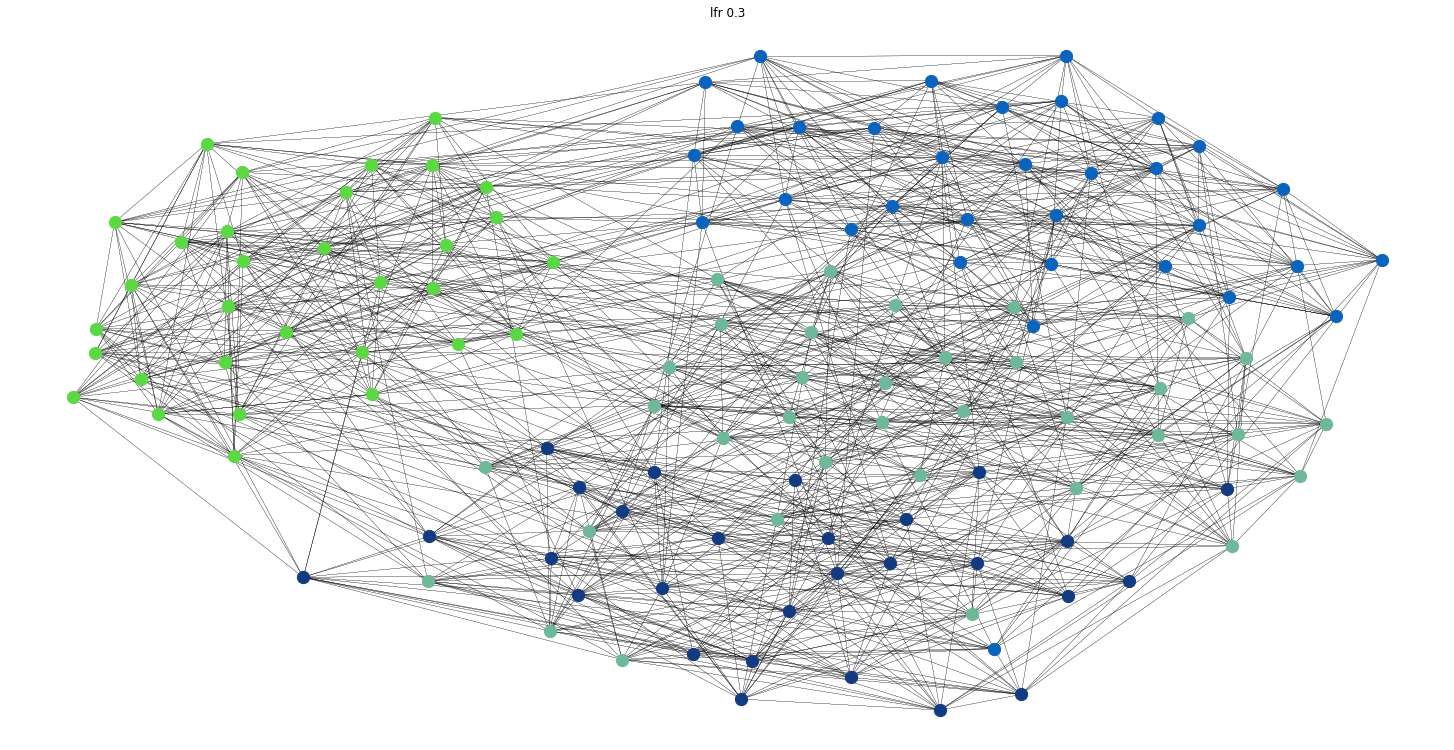

In [51]:
autoencoderProject.show_clustering(G_data,B_data,datasets[choice],encoder,r_state)

# Calculating NMI on lfr 0.5 dataset

Enter your choice (0-7):6


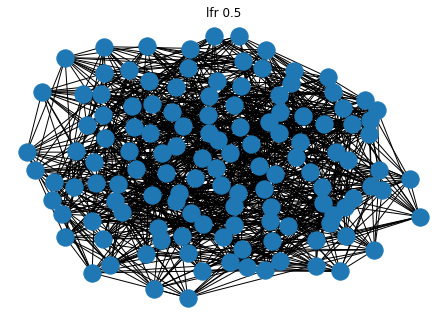

In [52]:
# Choosing and drawing dataset
choice = input("Enter your choice (0-7):")
G_data,B_data=autoencoderProject.load_dataset(datasets[choice])
autoencoderProject.drawDataset(G_data,datasets[choice])

epoch : 1/100, recon loss = 0.11840741
epoch : 2/100, recon loss = 0.11647331
epoch : 3/100, recon loss = 0.11474728
epoch : 4/100, recon loss = 0.11319687
epoch : 5/100, recon loss = 0.11179191
epoch : 6/100, recon loss = 0.11050579
epoch : 7/100, recon loss = 0.10931611
epoch : 8/100, recon loss = 0.10820445
epoch : 9/100, recon loss = 0.10715575
epoch : 10/100, recon loss = 0.10615774
epoch : 11/100, recon loss = 0.10520041
epoch : 12/100, recon loss = 0.10427556
epoch : 13/100, recon loss = 0.10337639
epoch : 14/100, recon loss = 0.10249715
epoch : 15/100, recon loss = 0.10163290
epoch : 16/100, recon loss = 0.10077923
epoch : 17/100, recon loss = 0.09993223
epoch : 18/100, recon loss = 0.09908839
epoch : 19/100, recon loss = 0.09824470
epoch : 20/100, recon loss = 0.09739869
epoch : 21/100, recon loss = 0.09654850
epoch : 22/100, recon loss = 0.09569297
epoch : 23/100, recon loss = 0.09483162
epoch : 24/100, recon loss = 0.09396462
epoch : 25/100, recon loss = 0.09309266
epoch : 2

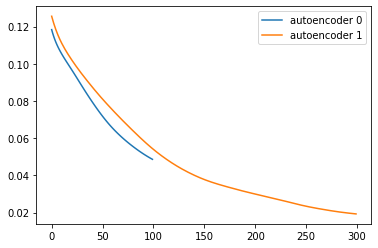

Index:0	Max NMI till now:0.1898888137634014
Index:0	Max NMI till now:0.1898888137634014
Index:0	Max NMI till now:0.1898888137634014
Index:206	Max NMI till now:0.19333123703769065
Index:206	Max NMI till now:0.19333123703769065
Index:206	Max NMI till now:0.19333123703769065
Index:206	Max NMI till now:0.19333123703769065
Index:206	Max NMI till now:0.19333123703769065
Index:206	Max NMI till now:0.19333123703769065
Index:820	Max NMI till now:0.19668410608853448
Index:989	Max NMI till now:0.2188316760684475
989


In [53]:
# Applying autoencoder and computing nmi score
encoder=autoencoderProject.fit_dataset(B_data,hidden_layers=hidden_layers[choice],epoch_per_layer=epoch_per_layer[choice])
r_state=autoencoderProject.calcMaxState(G_data, B_data, datasets[choice], encoder)
print(r_state)

NMI when applying only kmeans:0.2015
NMI on applying autoencoder:0.2188
Improvement upon kmeans:1.7%


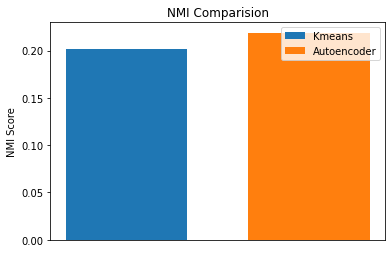

In [54]:
# Displaying results
original_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,only_kmeans=True)
optimized_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,r_state=r_state)

if((optimized_nmi-original_nmi)>0):
    print("NMI when applying only kmeans:{:.4f}".format(original_nmi))
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))
    print("Improvement upon kmeans:{:.1f}%".format((optimized_nmi-original_nmi)*100))
    fig, ax = plt.subplots()
    labels=['Kmeans','Autoencoder']
    x = np.arange(1)
    width=0.25
    rects1 = ax.bar(x + 0.0, original_nmi, width, label=labels[0])
    rects2 = ax.bar(x + 0.375, optimized_nmi, width, label=labels[1])
    ax.set_ylabel('NMI Score')
    ax.set_title('NMI Comparision')
    plt.xticks([])
    ax.legend()
    plt.show()
else:
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))







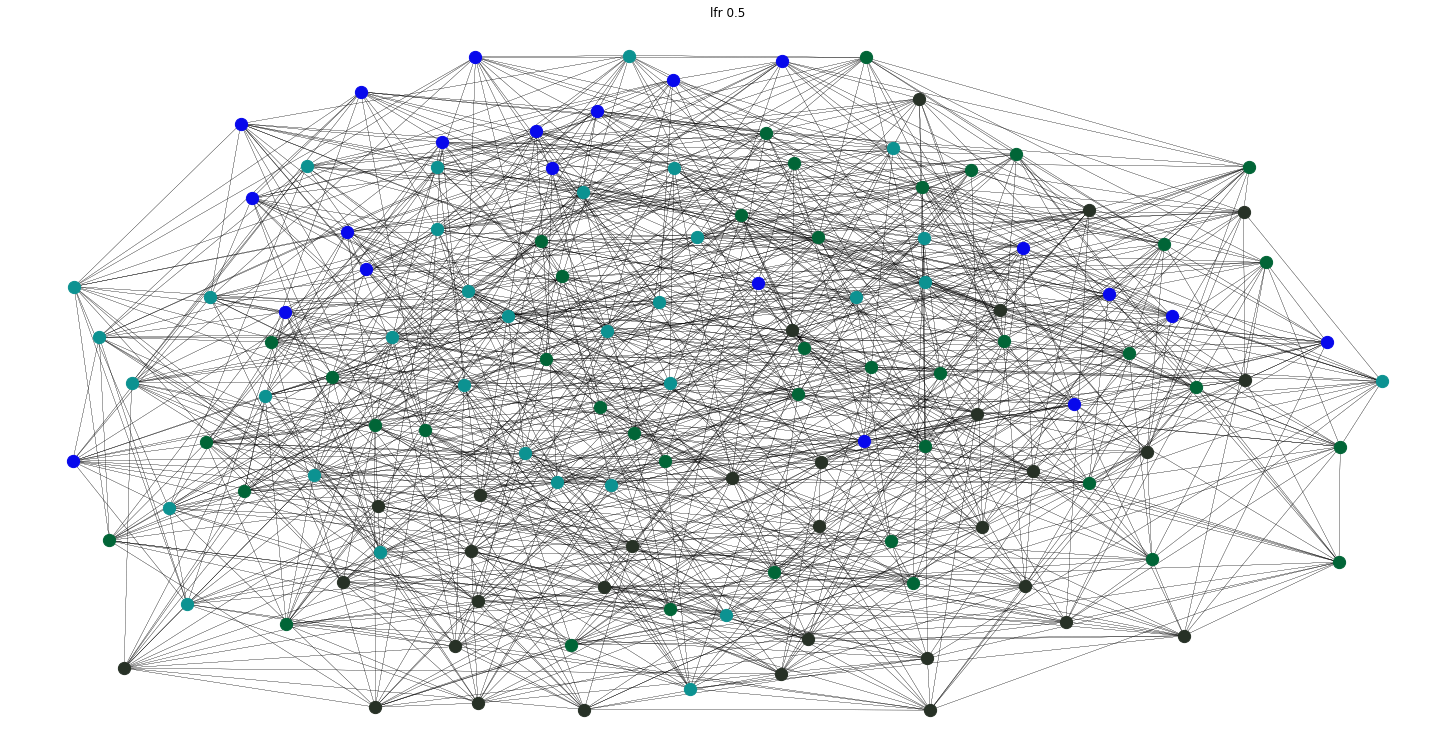

In [55]:
autoencoderProject.show_clustering(G_data,B_data,datasets[choice],encoder,r_state)

# Calculating NMI on Email Dataset

Enter your choice (0-7):7


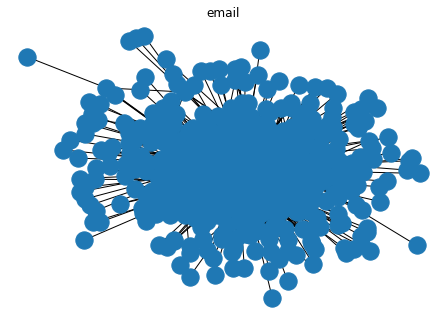

In [56]:
# Choosing and drawing dataset
choice = input("Enter your choice (0-7):")
G_data,B_data=autoencoderProject.load_dataset(datasets[choice])
autoencoderProject.drawDataset(G_data,datasets[choice])

epoch : 1/100, recon loss = 0.02933085
epoch : 2/100, recon loss = 0.02753086
epoch : 3/100, recon loss = 0.02613311
epoch : 4/100, recon loss = 0.02460484
epoch : 5/100, recon loss = 0.02308359
epoch : 6/100, recon loss = 0.02184568
epoch : 7/100, recon loss = 0.02080103
epoch : 8/100, recon loss = 0.01990144
epoch : 9/100, recon loss = 0.01916927
epoch : 10/100, recon loss = 0.01858803
epoch : 11/100, recon loss = 0.01808423
epoch : 12/100, recon loss = 0.01761020
epoch : 13/100, recon loss = 0.01715204
epoch : 14/100, recon loss = 0.01671429
epoch : 15/100, recon loss = 0.01630335
epoch : 16/100, recon loss = 0.01591580
epoch : 17/100, recon loss = 0.01554814
epoch : 18/100, recon loss = 0.01520003
epoch : 19/100, recon loss = 0.01486703
epoch : 20/100, recon loss = 0.01454551
epoch : 21/100, recon loss = 0.01423649
epoch : 22/100, recon loss = 0.01393875
epoch : 23/100, recon loss = 0.01364855
epoch : 24/100, recon loss = 0.01336468
epoch : 25/100, recon loss = 0.01308821
epoch : 2

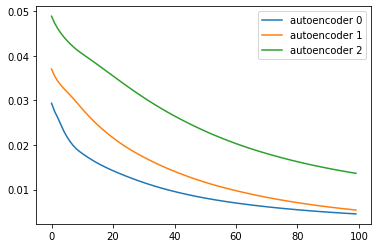

Index:0	Max NMI till now:0.523896605440805
Index:91	Max NMI till now:0.5335857115595002
Index:196	Max NMI till now:0.5394683576150165
196


In [57]:
# Applying autoencoder and computing nmi score
encoder=autoencoderProject.fit_dataset(B_data,hidden_layers=hidden_layers[choice],epoch_per_layer=epoch_per_layer[choice])
r_state=autoencoderProject.calcMaxState(G_data, B_data, datasets[choice], encoder)
print(r_state)

NMI when applying only kmeans:0.4785
NMI on applying autoencoder:0.5395
Improvement upon kmeans:6.1%


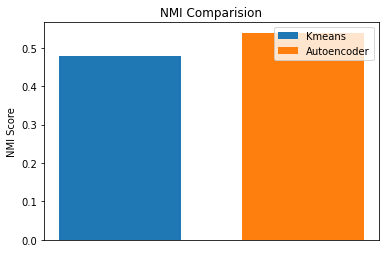

In [58]:
# Displaying results
original_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,only_kmeans=True)
optimized_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,r_state=r_state)

if((optimized_nmi-original_nmi)>0):
    print("NMI when applying only kmeans:{:.4f}".format(original_nmi))
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))
    print("Improvement upon kmeans:{:.1f}%".format((optimized_nmi-original_nmi)*100))
    fig, ax = plt.subplots()
    labels=['Kmeans','Autoencoder']
    x = np.arange(1)
    width=0.25
    rects1 = ax.bar(x + 0.0, original_nmi, width, label=labels[0])
    rects2 = ax.bar(x + 0.375, optimized_nmi, width, label=labels[1])
    ax.set_ylabel('NMI Score')
    ax.set_title('NMI Comparision')
    plt.xticks([])
    ax.legend()
    plt.show()
else:
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))


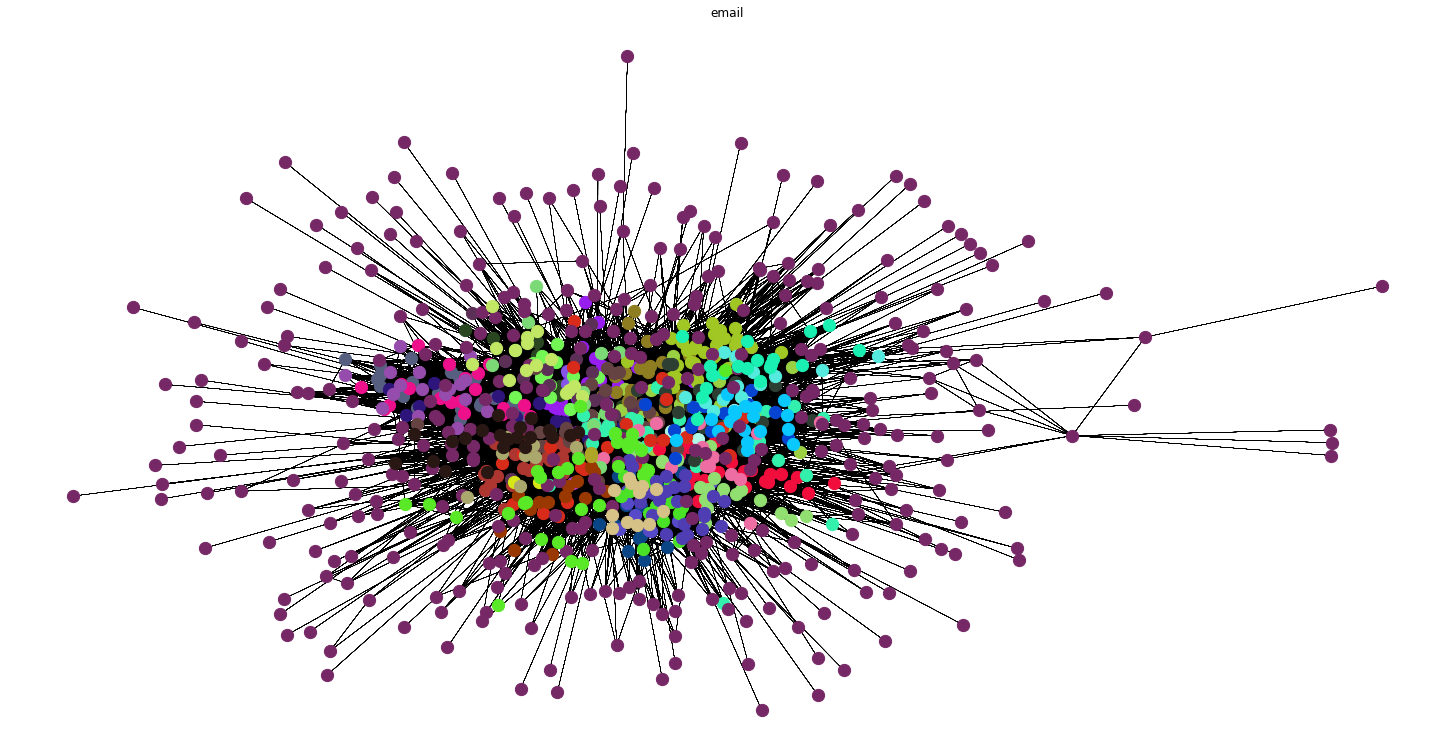

In [60]:
autoencoderProject.show_clustering(G_data,B_data,datasets[choice],encoder,r_state)